In [13]:
import nltk
import os
import chardet
import re

In [12]:
# nltk.download('gutenberg')

In [13]:
# alice=nltk.corpus.gutenberg.raw('carroll-alice.txt')
# ttt = nltk.tokenize.TextTilingTokenizer(stopwords='<EOS>')
# tiles = ttt.tokenize(alice[140309 : ])

Movie DIC
https://github.com/julianser/hed-dlg-truncated/issues/5

---

[The NPS Chat Corpus](http://faculty.nps.edu/cmartell/NPSChat.htm)
10,567 posts 

In [37]:
from nltk.corpus import nps_chat


In [42]:
for p in nps_chat.xml_posts()[3:5]:
    print(p.get("class"), p.get("user"))
    print(p.text)
    tagged_words = list((t.get("word"), t.get("pos")) for t in p[0]) # <-- here it is
    print(tagged_words)
    print()

Greet 10-19-20sUser59
hey everyone  
[('hey', 'UH'), ('everyone', 'NN')]

Statement 10-19-20sUser115
ah well
[('ah', 'UH'), ('well', 'UH')]



In [44]:
posts = nltk.corpus.nps_chat.xml_posts()
Labeled_names=[(post.text,post.get('class')) for post in posts]

In [46]:
Labeled_names[:30]

[('now im left with this gay name', 'Statement'),
 (':P', 'Emotion'),
 ('PART', 'System'),
 ('hey everyone  ', 'Greet'),
 ('ah well', 'Statement'),
 ('NICK :10-19-20sUser7', 'System'),
 ('10-19-20sUser7 is a gay name.', 'Accept'),
 ('.ACTION gives 10-19-20sUser121 a golf clap.', 'System'),
 (':)', 'Emotion'),
 ('JOIN', 'System'),
 ('hi 10-19-20sUser59', 'Greet'),
 ('26/ m/ ky women that are nice please pm me', 'Statement'),
 ('JOIN', 'System'),
 ('PART', 'System'),
 ('there ya go 10-19-20sUser7', 'Statement'),
 ("don't golf clap me.", 'Reject'),
 ('fuck you 10-19-20sUser121:@', 'Reject'),
 ('whats everyone up to?', 'whQuestion'),
 ('PART', 'System'),
 ('PART', 'System'),
 ("i'll thunder clap your ass.", 'Statement'),
 ('PART', 'System'),
 ('and i dont even know what that means.', 'Continuer'),
 ('that sounds painful', 'Statement'),
 ('any ladis wanna chat? 29 m', 'ynQuestion'),
 ('26/m', 'Statement'),
 ('JOIN', 'System'),
 ('my cousin drew a messed up pic on my cast', 'Statement'),
 ('

---
TextTiling

Similarity determination:


* Vocabulary Introduction: Similarity is measured as the negative of the number of new terms introduced on either side of the gap

* Block Comparison: compute correlation coefficients between left and right blocks based on within-block term frequency (without inverse document frequency) (We will use this method) Normalized inner product of two word vectors

In [121]:
def multiple_replace(dict_, text):
    # Create a regular expression  from the dictionary keys
    regex = re.compile("(%s)" % "|".join(map(re.escape, dict_.keys())))
    # For each match, look-up corresponding value in dictionary
    return regex.sub(lambda mo: dict_[mo.string[mo.start():mo.end()]], text) 

dict_sub = {'\"':'\'','´':'\'',
            '\'s':' \'s','\'m':' \'m','\'ve':' \'ve','\'re':' \'re','\'ll':' \'ll','\'d':' \'d'}

In [2]:
from smart_open import smart_open
class MyCorpus(object):
    def __init__(self, dirname):
        self.dirname = dirname
 
    def __iter__(self):
        for fname in os.listdir(self.dirname):
            if not fname.endswith('.txt'):
                continue
            f = open(os.path.join(self.dirname, fname), 'rb')
            line = f.read()
            f.close()

#             for line in smart_open(os.path.join(self.dirname, fname), 'rb'):
            encode_type = chardet.detect(line)  
            line = line.decode(encode_type['encoding']) #进行相应解码，赋给原标识符（变量）
            line = line.replace('<EOS>\n','\n')
            line = line.replace('<EOS>','\n')
            line = line.replace('\n','\n\n')
            yield line

In [3]:
corpus = MyCorpus('./data/')

In [4]:
sentences_list = []
for s in corpus:
    sentences_list.append(s)
#sentences = ' '.join(sentences)

In [31]:
# sentences = ' '.join(sentences_list)
sentences = sentences_list[1]
ttt = nltk.tokenize.TextTilingTokenizer(w=5)
tiles = ttt.tokenize(sentences)

In [32]:
f = open('./TextSegment/TextTiling.txt','a')
for item in tiles:
    f.write(item)
    f.write('\n\n================END OF THIS SEGMENT================\n\n')

In [34]:
sentences.count('\n\n')

1289

In [35]:
len(tiles)

225

In [36]:
sentences.count('\n\n')/len(tiles)

5.728888888888889

---
Word Embedding + TextTiling like + virtual sentence

In [63]:
from gensim import corpora,models
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import matplotlib.pyplot as plt

In [204]:
from smart_open import smart_open
class MyCorpus2(object):
    def __init__(self, dirname):
        self.dirname = dirname
 
    def __iter__(self):
        for fname in os.listdir(self.dirname):
            if not fname.endswith('.txt'):
                continue
            for line in smart_open(os.path.join(self.dirname, fname), 'rb'):
#             for line in smart_open(os.path.join(self.dirname, fname), 'rb'):
                encode_type = chardet.detect(line) 
                line = line.decode(encode_type['encoding']) #进行相应解码，赋给原标识符（变量）
                line = line.lower()
                line = multiple_replace(dict_sub, line)
                
                line = re.sub(',|\.|\?|\!|\.\.\.|-', '', line)
                line = line.replace('<eos>\n','')
                line = line.replace('<eos>','')
                yield line

In [205]:
sentences = MyCorpus2('./data/')
sentences = [x.split() for x in sentences]

In [206]:
model = models.Word2Vec(sentences, min_count=1,size=256)

In [207]:
sentences[0]

['a',
 'big',
 'typhoon',
 'is',
 'brewing',
 'south',
 'of',
 'the',
 'ryukyu',
 'islands',
 'heading',
 'northeast',
 'at',
 '<num>',
 'mile',
 'per',
 'hour']

In [208]:
print(model)

Word2Vec(vocab=3212, size=256, alpha=0.025)


In [210]:
heuristic_max(sentences[1],sentences[10],model)

0.9999287009239197

In [199]:
similarity = []
for i in range(len(sentences)-1):
    similarity.append(heuristic_max(sentences[i],sentences[i+1]))

In [181]:
len(similarity)

1036

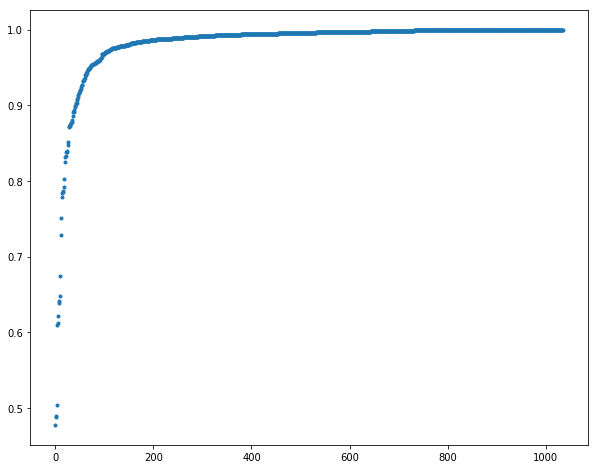

In [200]:
plt.figure(figsize=(10,8))
plt.plot(np.sort(similarity),'.')


In [201]:
np.quantile(similarity,0.05)

0.9214488979625074

---
## Cornell dataset

### sort lines by IDs and save to .txt files

In [14]:
from smart_open import smart_open
import os
import chardet
import numpy as np
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import nltk
import pandas as pd

In [1]:
stop = set(stopwords.words('english'))

def read_lines(dirname):
    line_dict = {}
    with open(dirname, 'r', encoding='iso-8859-1') as f:  # TODO: Solve Iso encoding pb !
        tokenizer = RegexpTokenizer(r'\w+')
        for line in f:
            line = line.replace('[','').replace(']','')
            tmp = line.split('\n')[0].split(" +++$+++ ")
            line_ = nltk.word_tokenize(tmp[-1])
#             line_ = tokenizer.tokenize(tmp[-1].lower())
#             line_ = [x for x in line_ if x not in stop]
            line_dict[tmp[0]] = {'ID1':tmp[1],'MovieID':tmp[2],'Name':tmp[3],'Line':line_}
        return line_dict
    
def read_conversations(dirname):
    conva_dict = {}
    with open(dirname, 'r', encoding='iso-8859-1') as f:  # TODO: Solve Iso encoding pb !
        for line in f:
            line = line.replace('[','').replace(']','').replace('\'','')
            tmp = line.split('\n')[0].split(" +++$+++ ")
            yield tmp

In [2]:
movie_lines = read_lines('../datasets/cornell-corpus/movie_lines.txt')

In [3]:
conversations = read_conversations('../datasets/cornell-corpus/movie_conversations.txt')
conversations = [x for x in conversations]

In [6]:
conversations = pd.DataFrame(conversations)
conversations.columns = ['ID1','ID2','MovieID','LineIDs']
conversations.head(5)

,ID1,ID2,MovieID,LineIDs
0,u0,u2,m0,"L194, L195, L196, L197"
1,u0,u2,m0,"L198, L199"
2,u0,u2,m0,"L200, L201, L202, L203"
3,u0,u2,m0,"L204, L205, L206"
4,u0,u2,m0,"L207, L208"


In [7]:
for ids in conversations.LineIDs[0].split(', '):
    print(ids,movie_lines[ids]['Line'])

L194 ['Can', 'we', 'make', 'this', 'quick', '?', 'Roxanne', 'Korrine', 'and', 'Andrew', 'Barrett', 'are', 'having', 'an', 'incredibly', 'horrendous', 'public', 'break-', 'up', 'on', 'the', 'quad', '.', 'Again', '.']
L195 ['Well', ',', 'I', 'thought', 'we', "'d", 'start', 'with', 'pronunciation', ',', 'if', 'that', "'s", 'okay', 'with', 'you', '.']
L196 ['Not', 'the', 'hacking', 'and', 'gagging', 'and', 'spitting', 'part', '.', 'Please', '.']
L197 ['Okay', '...', 'then', 'how', "'bout", 'we', 'try', 'out', 'some', 'French', 'cuisine', '.', 'Saturday', '?', 'Night', '?']


In [8]:
def split_func(string):
    return int(string.split(', ')[0][1:]) 

conversations['startID'] = conversations.LineIDs.apply(split_func)
conversations = conversations.sort_values(by='startID').reset_index(drop=True)
conversations.head(5)

,ID1,ID2,MovieID,LineIDs,startID
0,u0,u3,m0,"L49, L50, L51",49
1,u8,u9,m0,"L59, L60, L61, L62",59
2,u2,u7,m0,"L63, L64, L65",63
3,u2,u7,m0,"L66, L67, L68, L69, L70, L71, L72, L73, L74",66
4,u2,u7,m0,"L77, L78",77


In [9]:
test = (conversations[['ID1','ID2']] == conversations[['ID1','ID2']].shift())
conversations['label'] = 1-(test['ID1'] & test['ID2'])*1
conversations.head(5)

,ID1,ID2,MovieID,LineIDs,startID,label
0,u0,u3,m0,"L49, L50, L51",49,1
1,u8,u9,m0,"L59, L60, L61, L62",59,1
2,u2,u7,m0,"L63, L64, L65",63,1
3,u2,u7,m0,"L66, L67, L68, L69, L70, L71, L72, L73, L74",66,0
4,u2,u7,m0,"L77, L78",77,0


In [10]:
len_ = np.where(conversations.label==1)[0][1:] - np.where(conversations.label==1)[0][:-1]
len_ = np.append(len_,conversations.label.tail(1))

In [11]:
s_cnt = [[x]*y for x,y in zip(np.arange(sum(conversations.label)),len_)]
s_cnt = [item for sublist in s_cnt for item in sublist]

In [12]:
conversations['s_cnt'] = s_cnt

In [13]:
conversations.head()

,ID1,ID2,MovieID,LineIDs,startID,label,s_cnt
0,u0,u3,m0,"L49, L50, L51",49,1,0
1,u8,u9,m0,"L59, L60, L61, L62",59,1,1
2,u2,u7,m0,"L63, L64, L65",63,1,2
3,u2,u7,m0,"L66, L67, L68, L69, L70, L71, L72, L73, L74",66,0,2
4,u2,u7,m0,"L77, L78",77,0,2


In [15]:
foo = lambda a: ', '.join(a) 
conv_new = conversations.groupby(['ID1','ID2','s_cnt']).agg({'LineIDs':foo}).reset_index()
conv_new = conv_new.sort_values(by='s_cnt').reset_index(drop=True)

In [16]:
conv_new['Turn'] = conv_new.LineIDs.str.split(',').apply(len)

In [608]:
def avg_wlen(IDs):
    """
    Return average word counts of each sentence in one dialogue.
    """
    l = 0
    tokenizer = RegexpTokenizer(r'\w+')
    for ID in IDs:
        l += len(tokenizer.tokenize(' '.join(movie_lines[ID]['Line'])))
    return l/len(IDs)

conv_new['Word_cnt'] = conv_new.LineIDs.str.split(', ').apply(avg_wlen)

In [616]:
tokenizer = RegexpTokenizer(r'\w+')
for ID in conv_new.LineIDs.loc[6].split(', '):
    l = tokenizer.tokenize(' '.join(movie_lines[ID]['Line']))
    print(len(l),l)

14 ['The', 'vintage', 'look', 'is', 'over', 'Kat', 'Have', 'n', 't', 'you', 'been', 'reading', 'your', 'Sassy']
20 ['Yeah', 'and', 'I', 'noticed', 'the', 'only', 'part', 'of', 'you', 'featured', 'in', 'your', 'big', 'Kmart', 'spread', 'was', 'your', 'elbow', 'Tough', 'break']
9 ['They', 're', 'running', 'the', 'rest', 'of', 'me', 'next', 'month']


In [600]:
conv_new.head(10)

,ID1,ID2,s_cnt,LineIDs,Turn,Word_cnt
0,u0,u3,0,"L49, L50, L51",3,5.000000
1,u8,u9,1,"L59, L60, L61, L62",4,8.500000
2,u2,u7,2,"L63, L64, L65, L66, L67, L68, L69, L70, L71, L...",20,8.700000
3,u5,u8,3,"L103, L104, L105, L106, L107, L108, L109",7,15.714286
4,u5,u6,4,"L123, L124, L125, L126, L127, L128, L129, L130...",12,11.666667
5,u2,u7,5,"L139, L140, L141, L142, L143, L144, L145, L146...",9,14.666667
6,u4,u5,6,"L148, L149, L150",3,16.333333
7,u5,u6,7,"L151, L152",2,12.500000
8,u2,u7,8,"L157, L158, L159",3,8.333333
9,u10,u11,9,"L161, L162",2,4.500000


In [609]:
conv_new.describe()

,s_cnt,Turn,Word_cnt
count,43051.000000,43051.000000,43051.000000
mean,21525.000000,7.077954,11.055441
std,12427.897556,9.385734,6.990198
min,0.000000,2.000000,0.000000
25%,10762.500000,2.000000,6.500000
50%,21525.000000,4.000000,9.636364
75%,32287.500000,8.000000,13.750000
max,43050.000000,315.000000,167.000000


In [613]:
conv_new.to_csv('../datasets/cornell-corpus/cleaned.csv',index=False)

In [238]:
# save cornell corpus line by line in .txt
# for movie in conversations.MovieID.unique():
#     tmp_df = conversations.loc[conversations.MovieID==movie].copy()
#     tmp_df = pd.DataFrame(tmp_df.LineIDs.str.split(', ').tolist(),index=tmp_df.MovieID).stack()
#     tmp_df = tmp_df.reset_index()
#     tmp_df.columns = ['MovieID','label','LineIDs']
#     for i in range(len(tmp_df)):
#         s = movie_lines[tmp_df.LineIDs.loc[i]]['Line']
#         with open('./data/cornell/%s.txt'%movie, 'a') as f:
#             f.write(' '.join(s)+'\n')

### Train word2vec model with virtual sentences

improve our own model using google-news

https://stackoverflow.com/questions/35117491/is-it-possible-to-re-train-a-word2vec-model-e-g-googlenews-vectors-negative300

In [63]:
import pandas as pd
import gensim
import matplotlib.pyplot as plt
from nltk.tokenize import RegexpTokenizer
from prettytable import PrettyTable

In [3]:
# train word2vec model from files sentence by sentence
class MySentences(object):
    def __init__(self, dirname):
        self.dirname = dirname
 
    def __iter__(self):
        for fname in os.listdir(self.dirname):
            tmp = []
            for line in open(os.path.join(self.dirname, fname)):
                yield tmp+line.split() # virtual sentences
                tmp = line.split()

In [21]:
sentences = MySentences('./data/cornell/') # a memory-friendly iterator
model4 = gensim.models.Word2Vec(iter=1,size=300)  # an empty model, no training yet
model4.build_vocab(sentences)  # can be a non-repeatable, 1-pass generator

model4.intersect_word2vec_format('GoogleNews-vectors-negative300.bin.gz',
                                lockf=1.0, # allow further training updates of merged vectors
                                binary=True)

model4.train(sentences,total_examples=model4.corpus_count,epochs=model4.epochs)

(5554123, 8351942)

In [22]:
model4.save('./word2vec/model_inter_virtual')

In [1018]:
model5.wv.similar_by_word('you')

[('i', 0.6724448204040527),
 ('we', 0.6424981355667114),
 ('they', 0.6244159936904907),
 ('me', 0.5909267663955688),
 ('yourself', 0.5590981245040894),
 ('myself', 0.5522865056991577),
 ('ya', 0.5132495164871216),
 ('him', 0.5076416730880737),
 ('really', 0.5028871297836304),
 ('now', 0.493304044008255)]

In [560]:
# train word2vec model from files sentence by sentence
class MySentences(object):
    def __init__(self, dirname):
        self.dirname = dirname
 
    def __iter__(self):
        tokenizer = RegexpTokenizer(r'\w+')
#         stop = set(stopwords.words('english'))
        for fname in os.listdir(self.dirname):
            tmp = []
            for line in open(os.path.join(self.dirname, fname)):
                tmp2 = tokenizer.tokenize(line.lower())
#                 tmp2 = [x for x in tmp2 if x not in stop]
                yield tmp+tmp2 # virtual sentences
                tmp = tmp2

In [558]:
sentences = MySentences('./data/cornell/') # a memory-friendly iterator
model5 = gensim.models.Word2Vec(iter=1,size=300)  # an empty model, no training yet
model5.build_vocab(sentences)  # can be a non-repeatable, 1-pass generator

model5.intersect_word2vec_format('GoogleNews-vectors-negative300.bin.gz',
                                lockf=1.0, # allow further training updates of merged vectors
                                binary=True)

model5.train(sentences,total_examples=model5.corpus_count,epochs=model5.epochs)

(4786306, 6942548)

In [559]:
model5.save('./word2vec/model_inter_virtual_token')

In [852]:
model5.wv.similarity('thank','welcome')

0.4416247428667037

### session segmentation

In [88]:
import gensim
from nltk.tokenize import RegexpTokenizer
import pandas as pd

import matplotlib.pyplot as plt
from prettytable import PrettyTable
# Load Google's pre-trained Word2Vec model.
# model1 = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)
model4 = gensim.models.Word2Vec.load('./word2vec/model_inter_virtual')

In [77]:
model5 = gensim.models.Word2Vec.load('./word2vec/model_inter_virtual_token')

In [78]:
def cos_sim(v1,v2):
    return v1.dot(v2)/(np.linalg.norm(v1)*np.linalg.norm(v2))

In [79]:
def heuristic_max(s1_ID,s2_ID,line_dict, model=model4.wv,flag=False):
#     s1 = list(set(s1))
#     s2 = list(set(s2))
    s1 = movie_lines[s1_ID]['Line']
    s2 = movie_lines[s2_ID]['Line']
    if flag:
        tokenizer = RegexpTokenizer(r'\w+')
        s1 = tokenizer.tokenize(' '.join(s1).lower())
        s2 = tokenizer.tokenize(' '.join(s2).lower())
    
    if len(s1)*len(s2) == 0:
        return np.nan
    matrix = np.zeros((len(s1),len(s2)))
    for i in range(len(s1)):
        if s1[i] in model.vocab.keys():
            s1_vec = model[s1[i]]
        else:
            continue # if the source target word is not in vocabulary list then corresponding similiarity row = 0
        for j in range(len(s2)):            
            if s2[j] in model.vocab.keys():
                s2_vec = model[s2[j]]
                matrix[i][j] = cos_sim(s1_vec,s2_vec)
            else:
                continue # for not-found words the similarity is 0
    return np.sum(np.max(matrix,1))/len(s1)
    #return matrix

In [80]:
# copy from https://scipy-cookbook.readthedocs.io/items/SignalSmooth.html
import numpy

def smooth(x,window_len=11,window='hanning'):
    """smooth the data using a window with requested size.
    
    This method is based on the convolution of a scaled window with the signal.
    The signal is prepared by introducing reflected copies of the signal 
    (with the window size) in both ends so that transient parts are minimized
    in the begining and end part of the output signal.
    
    input:
        x: the input signal 
        window_len: the dimension of the smoothing window; should be an odd integer
        window: the type of window from 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'
            flat window will produce a moving average smoothing.

    output:
        the smoothed signal
        
    example:

    t=linspace(-2,2,0.1)
    x=sin(t)+randn(len(t))*0.1
    y=smooth(x)
    
    see also: 
    
    numpy.hanning, numpy.hamming, numpy.bartlett, numpy.blackman, numpy.convolve
    scipy.signal.lfilter
 
    TODO: the window parameter could be the window itself if an array instead of a string
    NOTE: length(output) != length(input), to correct this: return y[(window_len/2-1):-(window_len/2)] instead of just y.
    """

    if x.ndim != 1:
        raise(ValueError, "smooth only accepts 1 dimension arrays.")

    if x.size < window_len:
        raise(ValueError, "Input vector needs to be bigger than window size.")

    if window_len<3:
        return x

    if not window in ['flat', 'hanning', 'hamming', 'bartlett', 'blackman']:
        raise(ValueError, "Window is on of 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'")


    s=numpy.r_[x[window_len-1:0:-1],x,x[-2:-window_len-1:-1]]
    #print(len(s))
    if window == 'flat': #moving average
        w=numpy.ones(window_len,'d')
    else:
        w=eval('numpy.'+window+'(window_len)')

    y=numpy.convolve(w/w.sum(),s,mode='valid')
    return y[window_len//2:-window_len//2+1]

In [1021]:
conv_new.describe()

,s_cnt,Turn,Word_cnt
count,43051.000000,43051.000000,43051.000000
mean,21525.000000,7.077954,11.055441
std,12427.897556,9.385734,6.990198
min,0.000000,2.000000,0.000000
25%,10762.500000,2.000000,6.500000
50%,21525.000000,4.000000,9.636364
75%,32287.500000,8.000000,13.750000
max,43050.000000,315.000000,167.000000


In [633]:
conv_filter = conv_new.loc[(conv_new.Turn>=4) & (conv_new.Turn<=10) &
                           (conv_new.Word_cnt>=7) & (conv_new.Word_cnt<=15)].copy()

In [621]:
len(conv_new)

43051

In [620]:
len(conv_filter)

15407

In [618]:
len(conv_filter)

8699

In [634]:
new_df = pd.DataFrame(conv_filter.LineIDs.str.split(', ').tolist(),index=conv_filter.s_cnt).stack()
new_df = new_df.reset_index()
new_df.columns = ['MovieID','label','LineIDs']
new_df.label = 1 - new_df.label.clip(upper=1)
new_df.head(10)

,MovieID,label,LineIDs
0,1,1,L59
1,1,0,L60
2,1,0,L61
3,1,0,L62
4,3,1,L103
5,3,0,L104
6,3,0,L105
7,3,0,L106
8,3,0,L107
9,3,0,L108


In [635]:
new_df.describe()

,MovieID,label
count,54943.000000,54943.000000
mean,21551.691753,0.158328
std,12487.169909,0.365051
min,1.000000,0.000000
25%,10822.000000,0.000000
50%,21675.000000,0.000000
75%,32243.000000,0.000000
max,43046.000000,1.000000


In [636]:
# heuristic max using model 4 (upper case; puncuation)
sim = [heuristic_max(new_df.LineIDs[i],
                     new_df.LineIDs[i+1],
                     line_dict = movie_lines,
                    model=model4.wv) for i in range(len(new_df)-1)]
sim_ = [np.nan] + sim
new_df['similarity'] = sim_

In [637]:
# heuristic max using model 5 (lower case; no puncuation)
sim = [heuristic_max(new_df.LineIDs[i],
                     new_df.LineIDs[i+1],
                     line_dict = movie_lines,
                    model=model5.wv,
                    flag=True) for i in range(len(new_df)-1)]
sim_ = [np.nan] + sim
new_df['similarity_lower'] = sim_

In [638]:
new_df.head()

,MovieID,label,LineIDs,similarity,similarity_lower
0,1,1,L59,NaN,NaN
1,1,0,L60,0.727971,0.641736
2,1,0,L61,0.474507,0.412171
3,1,0,L62,0.264014,0.201401
4,3,1,L103,0.334237,0.337516


In [68]:
# new_df.to_csv('TextSimilarity.csv',index=False)

In [84]:
new_df = pd.read_csv('TextSimilarity.csv')

In [168]:
new_df

,MovieID,label,LineIDs,similarity
0,1,1,L59,NaN
1,1,0,L60,0.727972
2,1,0,L61,0.486083
3,1,0,L62,0.275052
4,3,1,L103,0.334237
5,3,0,L104,0.463701
6,3,0,L105,0.518519
7,3,0,L106,0.394011
8,3,0,L107,0.396454
9,3,0,L108,0.161290


In [169]:
new_df.describe()

,MovieID,label,similarity
count,95046.000000,95046.000000,94908.000000
mean,21460.702828,0.162100,0.462733
std,12451.119892,0.368545,0.141396
min,1.000000,0.000000,-0.079716
25%,10661.000000,0.000000,0.363160
50%,21450.000000,0.000000,0.449160
75%,32050.000000,0.000000,0.548657
max,43046.000000,1.000000,1.000000


In [170]:
new_df.loc[new_df.label==1].describe()

,MovieID,label,similarity
count,15407.000000,15407.0,15383.000000
mean,21465.194911,1.0,0.440431
std,12439.838487,0.0,0.128006
min,1.000000,1.0,-0.058028
25%,10691.500000,1.0,0.351922
50%,21496.000000,1.0,0.430963
75%,32062.000000,1.0,0.519438
max,43046.000000,1.0,1.000000


In [171]:
new_df.loc[new_df.label==0].describe()

,MovieID,label,similarity
count,79639.000000,79639.0,79525.000000
mean,21459.833787,0.0,0.467046
std,12453.379076,0.0,0.143443
min,1.000000,0.0,-0.079716
25%,10655.000000,0.0,0.365776
50%,21438.000000,0.0,0.452848
75%,32049.000000,0.0,0.554576
max,43046.000000,0.0,1.000000


对每个label=1起始的句子，在后续s size句子中找到合适的threshold进行切割。
s size越大该方法对比random split的差异越明显。

s size too small: not obvious changes in std
s size too large: th too low.

In [172]:
new_df

,MovieID,label,LineIDs,similarity
0,1,1,L59,NaN
1,1,0,L60,0.727972
2,1,0,L61,0.486083
3,1,0,L62,0.275052
4,3,1,L103,0.334237
5,3,0,L104,0.463701
6,3,0,L105,0.518519
7,3,0,L106,0.394011
8,3,0,L107,0.396454
9,3,0,L108,0.161290


In [85]:
scores = new_df.loc[~new_df.similarity.isnull()].similarity.get_values()
labels = new_df.loc[~new_df.similarity.isnull()].label.get_values()
LineIDs = new_df.loc[~new_df.similarity.isnull()].LineIDs.get_values()
smooth_score = smooth(scores)

In [86]:
s_dict = {}
start_idx = np.where(labels==1)[0]

s_size = 16
# block_size = 5

for i in start_idx:
    s = smooth_score[i:i+s_size]
    block_label = np.where(labels[i:i+s_size])[0]
    if len(block_label) < 2:
        continue
    depth_score = [0]
    lpeak = s[0]
    for k in range(1,len(s)):
#         idx = max(0,k-block_size)
        lpeak = max(s[0:k+1])
        depth_score.append(s[k]-lpeak)
    s_dict[i] = {}
    s_dict[i]['depth score'] = np.array(depth_score)
    s_dict[i]['smooth score'] = s
    s_dict[i]['depth mean'] = np.mean(depth_score)
    s_dict[i]['depth std'] = np.std(depth_score)
    s_dict[i]['block label'] = block_label
    s_dict[i]['length'] = block_label[1]
    s_dict[i]['LineIDs'] = LineIDs[i]
s_df = pd.DataFrame.from_dict(s_dict).T

In [97]:
[x if x > 0 else s_size-1 for x in diff]

[15,
 4.0,
 15,
 3.0,
 15,
 4.0,
 15,
 15,
 3.0,
 15,
 15,
 11.0,
 1.0,
 1.0,
 8.0,
 3.0,
 15,
 15,
 1.0,
 4.0,
 4.0,
 15,
 2.0,
 15,
 15,
 2.0,
 8.0,
 2.0,
 8.0,
 2.0,
 15,
 5.0,
 6.0,
 15,
 4.0,
 6.0,
 9.0,
 4.0,
 15,
 6.0,
 2.0,
 1.0,
 15,
 15,
 15,
 2.0,
 5.0,
 2.0,
 15,
 8.0,
 6.0,
 7.0,
 2.0,
 15,
 15,
 15,
 10.0,
 9.0,
 1.0,
 1.0,
 15,
 3.0,
 15,
 1.0,
 1.0,
 10.0,
 15,
 15,
 5.0,
 1.0,
 8.0,
 3.0,
 3.0,
 9.0,
 15,
 15,
 5.0,
 15,
 15,
 9.0,
 15,
 15,
 1.0,
 2.0,
 3.0,
 15,
 8.0,
 15,
 3.0,
 3.0,
 10.0,
 5.0,
 2.0,
 15,
 2.0,
 5.0,
 2.0,
 15,
 15,
 15,
 15,
 8.0,
 3.0,
 4.0,
 15,
 15,
 4.0,
 1.0,
 15,
 15,
 15,
 2.0,
 3.0,
 5.0,
 2.0,
 15,
 2.0,
 15,
 3.0,
 2.0,
 7.0,
 2.0,
 15,
 6.0,
 15,
 7.0,
 3.0,
 15,
 2.0,
 15,
 1.0,
 9.0,
 5.0,
 1.0,
 15,
 6.0,
 7.0,
 2.0,
 15,
 11.0,
 9.0,
 15,
 6.0,
 15,
 15,
 15,
 5.0,
 15,
 1.0,
 15,
 15,
 2.0,
 5.0,
 4.0,
 15,
 15,
 15,
 5.0,
 15,
 15,
 8.0,
 5.0,
 15,
 15,
 4.0,
 4.0,
 15,
 10.0,
 2.0,
 15,
 2.0,
 15,
 3.0,
 3.0,
 7.0,
 1.0,
 15,
 1

In [108]:
# block_labels = s_df['block label'].apply(lambda x:x[1])
length = s_df['length'].get_values()

table = PrettyTable()
table.field_names = ['alpha','th_mean','th_std','MAE','AvgLen','Pred Nan','Random MAE']

# nltk.texttiling: mean - std/2
alphas = [-0.05,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.1,1.2]
for alpha in alphas:
    block_labels = []
    pred = s_df['depth score'].apply(lambda x: next(iter(np.where(x<=np.mean(x)-alpha*np.std(x))[0]), None))
    delta = s_df['depth score'].apply(lambda x: next(iter(np.where((x[1:]-x[:-1])>0)[0]), s_size-1))
#     max_index = delta.loc[delta==s_size-1].index.get_values()
#     for i in max_index:
#         delta.loc[i] = pred.loc[i]
    s_df['pred'] = np.min((pred.get_values(),delta.get_values()),axis=0)
#     s_df['pred'] = delta

    mean_ = s_df['depth score'].apply(lambda x: np.mean(x))
    std_ = s_df['depth score'].apply(lambda x: np.std(x))
    th = np.array(mean_)-alpha*np.array(std_)
    for i in range(len(pred)):
        block_labels.append(min(s_df['block label'].iloc[i][1:], key=lambda x:abs(x-s_df['pred'].iloc[i])))
    diff = block_labels - pred # diff>0 when the predicted before ground truth
    acc = len(np.where(diff==0)[0])/len(diff)
    
    random_pred = np.random.randint(low=1,high=s_size+1,size=len(block_labels))
    random_diff = block_labels - random_pred
    
    loss = [x if x >= 0 else s_size-1 for x in diff]
    random_loss = [x if x >= 0 else s_size-1 for x in random_diff]
    
    table.add_row([alpha,
                   round(np.mean(th),3),
                   round(np.std(th),3),
#                   round(abs(diff).mean(),3),
                   np.mean(loss),
                   np.mean(pred),
#                   round(diff.mean(),3),
                  sum(np.isnan(pred)),
#                   round((abs(pred-block_labels)/length).mean(),3),
#                   round(abs(random_pred-block_labels).mean(),3)]
                   np.mean(random_loss)]
                 )
print(table)

+-------+---------+--------+--------------------+--------------------+----------+--------------------+
| alpha | th_mean | th_std |        MAE         |       AvgLen       | Pred Nan |     Random MAE     |
+-------+---------+--------+--------------------+--------------------+----------+--------------------+
| -0.05 |  -0.037 | 0.028  | 6.747302041347029  | 5.918541151995839  |    0     | 10.08145884800416  |
|   0   |  -0.039 | 0.029  | 6.9148355220387465 | 6.062020543492394  |    0     | 10.007021193602913 |
|  0.1  |  -0.042 |  0.03  | 7.187751917826031  | 6.348979326485503  |    0     | 9.958978026264464  |
|  0.2  |  -0.046 | 0.032  | 7.447015992718762  | 6.6254063190742425 |    0     | 9.977311142894292  |
|  0.3  |  -0.049 | 0.034  | 7.702704459758159  | 6.883695228188792  |    0     | 10.00994669093746  |
|  0.4  |  -0.052 | 0.036  | 7.934858926017423  | 7.154791314523469  |    0     | 9.983942270185931  |
|  0.5  |  -0.056 | 0.037  | 8.191522558835002  |  7.42289689247172  |   

In [113]:
alpha = 0.6
pred = s_df['depth score'].apply(lambda x: next(iter(np.where(x<=np.mean(x)-alpha*np.std(x))[0]), None))
delta = s_df['depth score'].apply(lambda x: next(iter(np.where((x[1:]-x[:-1])>0)[0]), s_size-1))
# s_df['pred'] = np.min((pred.get_values(),delta.get_values()),axis=0)
s_df['pred'] = delta

[ 0  5  9 14]


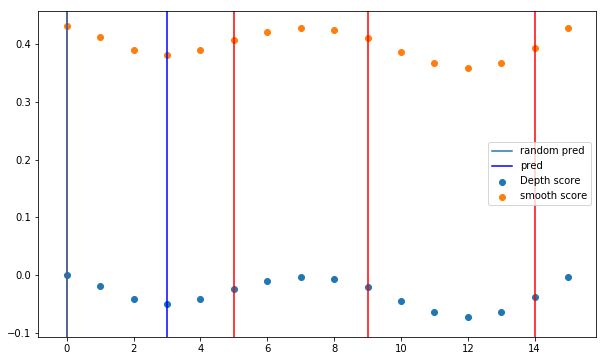

In [117]:
i = s_df.index[np.random.randint(1000)]

block_label = s_df['block label'].iloc[i]
block_pred = s_df['pred'].iloc[i]
depth_score = s_df['depth score'].iloc[i]
s = s_df['smooth score'].iloc[i]
plt.figure(figsize=(10,6))
for i in block_label:
    plt.axvline(i,c='r')
    
plt.axvline(np.random.randint(s_size+1),label='random pred')
plt.axvline(block_pred,c='b',label='pred')
plt.scatter(y=depth_score,x=np.arange(len(depth_score)),label='Depth score')
plt.scatter(y=s,x=np.arange(len(depth_score)),label='smooth score')
plt.legend()
print(block_label)

In [1066]:
scores = new_df.loc[~new_df.similarity_lower.isnull()].similarity_lower.get_values()
labels = new_df.loc[~new_df.similarity_lower.isnull()].label.get_values()
smooth_score = smooth(scores)

In [934]:
smooth(scores)[:20]

array([0.44998013, 0.44595294, 0.43415684, 0.41897477, 0.40540949,
       0.39312409, 0.37497087, 0.35548496, 0.34840755, 0.36111765])

In [936]:
smooth(scores[:20])

array([0.44998013, 0.44595294, 0.43415684, 0.41897477, 0.40540949,
       0.39312409, 0.37497087, 0.35548496, 0.34840755, 0.36111765,
       0.39024049, 0.41990759, 0.43513778, 0.42926698, 0.41193156,
       0.4013898 , 0.41076621, 0.43393601, 0.45575905, 0.46523023])

In [1114]:
s_dict = {}
start_idx = np.where(labels==1)[0]

s_size = 12
block_size = 5

for i in start_idx:
    s = smooth_score[i:i+s_size]
    block_label = np.where(labels[i:i+s_size])[0]
    if len(block_label) < 2:
        continue
    depth_score = [0]
    lpeak = s[0]
    for k in range(1,len(s)):
#         idx = max(0,k-block_size)
        lpeak = max(s[0:k+1])
        depth_score.append(s[k]-lpeak)
    s_dict[i] = {}
    s_dict[i]['depth score'] = np.array(depth_score)
    s_dict[i]['smooth score'] = s
    s_dict[i]['depth mean'] = np.mean(depth_score)
    s_dict[i]['depth std'] = np.std(depth_score)
    s_dict[i]['block label'] = block_label
    s_dict[i]['length'] = block_label[1]
s_df = pd.DataFrame.from_dict(s_dict).T

In [89]:
# block_labels = s_df['block label'].apply(lambda x:x[1])
length = s_df['length'].get_values()

table = PrettyTable()
table.field_names = ['alpha','MAE','Mean Err','Pred AVG','Pred Nan','Proportion','Random MAE']

# nltk.texttiling: mean - std/2
alphas = [0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.1,1.2]
for alpha in alphas:
    block_labels = []
    pred = s_df['depth score'].apply(lambda x: next(iter(np.where(x<=np.mean(x)-alpha*np.std(x))[0]), s_size))
    delta = np.array(s_df['depth score'][1:]) - np.array(s_df['depth score'][:-1])
    delta = np.where(delta>0)[0]
    pred = delta[0] if len(delta>0) else pred

    for i in range(len(pred)):
#         block_labels.append()
        block_labels.append(min(s_df['block label'].iloc[i][1:], key=lambda x:abs(x-pred.iloc[i])))
    diff = block_labels-pred
    random_pred = np.random.randint(low=1,high=s_size+1,size=len(block_labels))
    loss = [s_size if x < 0 else x for x in diff]
    diff_random = block_labels - random_pred
    loss_random = [s_size if x < 0 else x for x in diff_random]
    table.add_row([alpha,
                  round(np.mean(loss),3),
                  round(abs(diff).mean(),3),
                  round(np.mean(pred)),
                  sum(np.isnan(pred)),
                  round((abs(pred-block_labels)/length).mean(),3),
                  round(np.mean(loss_random),3)])
print(table)

ValueError: operands could not be broadcast together with shapes (15,) (16,) 

In [90]:
s_df['depth score']

3        [0.0, -0.0138233368685588, -0.0262579640501585...
10       [0.0, 0.0, 0.0, -0.007389717403350871, -0.0258...
19       [0.0, -0.006481902564558328, -0.02849676167163...
24       [0.0, -0.0002364546452150451, 0.0, 0.0, 0.0, 0...
33       [0.0, -0.018522958518744193, -0.04500633188198...
41       [0.0, 0.0, 0.0, 0.0, -0.00293043180445679, -0....
48       [0.0, -0.014851281914605108, -0.03354617235950...
57       [0.0, 0.0, -0.01456148150996539, -0.0299755530...
66       [0.0, -0.010956555416497926, -0.00109954802674...
76       [0.0, -0.03603769993910816, -0.082829472214315...
85       [0.0, 0.0, -0.017987573191786566, -0.045077829...
91       [0.0, -0.014675932619927778, -0.03828694719955...
95       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.00...
99       [0.0, 0.0, 0.0, 0.0, -0.0028019926023372665, -...
106      [0.0, -0.06135557207680037, -0.095940495078846...
110      [0.0, 0.0, 0.0, 0.0, 0.0, -0.03025972136164201...
115      [0.0, -0.06167246107332669, -0.132526220665221.

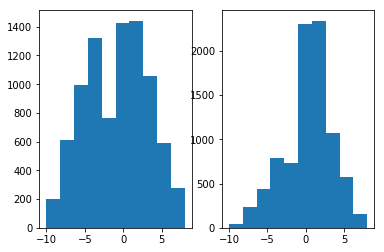

In [1129]:
plt.subplot(1,2,1)
_ = plt.hist(random_pred-block_labels)
plt.subplot(1,2,2)
_ = plt.hist(pred-block_labels)

In [97]:
i

14

[ 0  4  9 14]


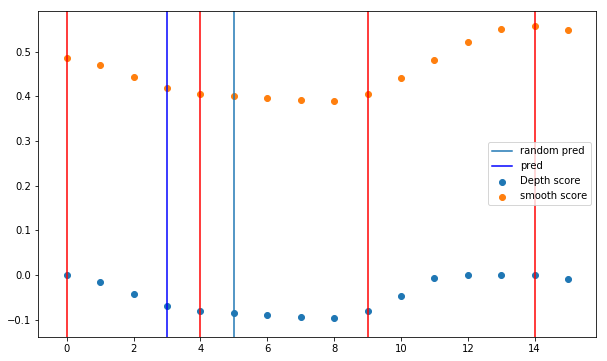

In [98]:
i = s_df.index[np.random.randint(1000)]

block_label = s_df['block label'].loc[i]
block_pred = pred.loc[i]
depth_score = s_df['depth score'].loc[i]
s = s_df['smooth score'].loc[i]
plt.figure(figsize=(10,6))
for i in block_label:
    plt.axvline(i,c='r')
    
plt.axvline(np.random.randint(s_size+1),label='random pred')
plt.axvline(block_pred,c='b',label='pred')
plt.scatter(y=depth_score,x=np.arange(len(depth_score)),label='Depth score')
plt.scatter(y=s,x=np.arange(len(depth_score)),label='smooth score')
plt.legend()
print(block_label)

In [1094]:
for l,ID in new_df.dropna().iloc[i:i+s_size,:][['label','LineIDs']].get_values():
    print(l,ID,' '.join(movie_lines[ID]['Line']))

0 L141 He always have that shit-eating grin ?
0 L142 Joey Dorsey ? Perma-shit-grin . I wish I could say he 's a moron , but he 's number twelve in the class . And a model . Mostly regional stuff , but he 's rumored to have a big tube sock ad coming out .
0 L143 You know French ?
0 L144 Sure do ... my Mom 's from Canada
0 L145 Guess who just signed up for a tutor ?
0 L146 You mean I 'd get a chance to talk to her ?
0 L147 You could consecrate with her , my friend .
1 L179 Now do n't get upset . Daddy , but there 's this boy ... and I think he might ask ...
0 L180 No ! You 're not dating until your sister starts dating . End of discussion .
0 L181 What if she never starts dating ?
0 L182 Then neither will you . And I 'll get to sleep at night .
0 L183 But it 's not fair -- she 's a mutant , Daddy !
1 L231 Hey .
0 L232 Are you lost ?
0 L233 Nope - just came by to chat
0 L234 We do n't chat .
0 L235 Well , actually , I thought I 'd run an idea by you . You know , just to see if you 're int

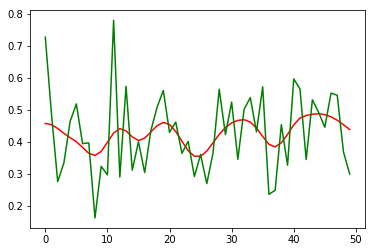

In [130]:
plt.plot(smooth(scores)[:50],c='r')
plt.plot(scores[:50],c='g')

In [48]:
block_size = 5
depth_scores = []
for i in range(block_size,len(smooth_score)-block_size):
    lpeak = max(scores[i-block_size:i])
    rpeak = max(scores[i+1:i+block_size+1])
    depth_scores.append(lpeak+rpeak-2*scores[i])
depth_scores = np.array(depth_scores)

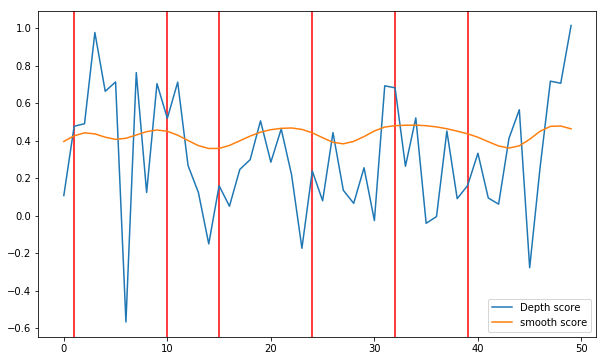

In [49]:
plt.figure(figsize=(10,6))
for i in np.where(labels[10:50])[0]:
    plt.axvline(i,c='r')
plt.plot(depth_scores[:50],label='Depth score')
plt.plot(smooth_score[10:60],label='smooth score')
plt.legend()

In [50]:
# miu = new_df.similarity.mean()
# std = new_df.similarity.std()
mean_ = np.mean(depth_scores)
std_ = np.std(depth_scores)
print(mean_,std_)

0.3401610764795546 0.3245246884296022


In [51]:
idx = np.where(labels[block_size:-block_size]==1)[0]
print(np.mean(depth_scores[idx]),np.std(depth_scores[idx]))

0.3507979999178254 0.32860664858809624


In [52]:
idx = np.where(labels[block_size:-block_size]==0)[0]
print(np.mean(depth_scores[idx]),np.std(depth_scores[idx]))

0.338102614871165 0.3236884369468224


In [53]:
alphas = np.arange(-1,1,0.05)
for alpha in alphas:
    th = mean_ + alpha*std_
    pred = (depth_scores<th).astype(int)
    idx = np.where(labels[block_size:-block_size]==1)[0]
    acc = sum(pred==labels[block_size:-block_size])/len(pred)
    p = sum(pred[idx])/sum(pred)
    r = sum(pred[idx])/sum(labels[block_size:-block_size])
    print('alpha:{:.3f},threshold:{:.3f},accuracy:{:.3f},precision:{:.3f},recall:{:.3f}'.format(alpha,th,acc,p,r))

alpha:-1.000,threshold:0.016,accuracy:0.732,precision:0.156,recall:0.148
alpha:-0.950,threshold:0.032,accuracy:0.723,precision:0.154,recall:0.158
alpha:-0.900,threshold:0.048,accuracy:0.715,precision:0.154,recall:0.169
alpha:-0.850,threshold:0.064,accuracy:0.707,precision:0.154,recall:0.180
alpha:-0.800,threshold:0.081,accuracy:0.698,precision:0.155,recall:0.194
alpha:-0.750,threshold:0.097,accuracy:0.688,precision:0.154,recall:0.206
alpha:-0.700,threshold:0.113,accuracy:0.678,precision:0.154,recall:0.218
alpha:-0.650,threshold:0.129,accuracy:0.668,precision:0.152,recall:0.230
alpha:-0.600,threshold:0.145,accuracy:0.657,precision:0.153,recall:0.246
alpha:-0.550,threshold:0.162,accuracy:0.646,precision:0.153,recall:0.262
alpha:-0.500,threshold:0.178,accuracy:0.635,precision:0.153,recall:0.278
alpha:-0.450,threshold:0.194,accuracy:0.624,precision:0.154,recall:0.294
alpha:-0.400,threshold:0.210,accuracy:0.611,precision:0.154,recall:0.312
alpha:-0.350,threshold:0.227,accuracy:0.598,precisi

In [234]:
conversations.head()

,ID1,ID2,MovieID,LineIDs,Turn,startID,label,s_cnt
0,u0,u3,m0,"L49, L50, L51",3,49,1,0
1,u8,u9,m0,"L59, L60, L61, L62",4,59,1,1
2,u2,u7,m0,"L63, L64, L65",3,63,1,2
3,u2,u7,m0,"L66, L67, L68, L69, L70, L71, L72, L73, L74",9,66,0,2
4,u2,u7,m0,"L77, L78",2,77,0,2


### Try on OpenSubtitle dataset

In [42]:
import re,gensim,os,chardet
import matplotlib.pyplot as plt
import numpy as np
from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer 
from nltk.tokenize import word_tokenize 
   
ps = PorterStemmer() 
tokenizer = RegexpTokenizer(r'\w+')

# ps.stem(x)

In [5]:
def multiple_replace(dict_, text):
    # Create a regular expression  from the dictionary keys
    regex = re.compile("(%s)" % "|".join(map(re.escape, dict_.keys())))
    # For each match, look-up corresponding value in dictionary
    return regex.sub(lambda mo: dict_[mo.string[mo.start():mo.end()]], text) 

dict_sub = {'\"':'\'','´':'\'',
            '\'s':' \'s','\'m':' \'m','\'ve':' \'ve','\'re':' \'re','\'ll':' \'ll','\'d':' \'d'}

In [36]:
def sentence_extract(line,dict_=dict_sub):
    encode_type = chardet.detect(line)  
    try:
        line = line.decode(encode_type['encoding']) #进行相应解码，赋给原标识符（变量）
        line = multiple_replace(dict_, line)
        line = line.replace('<EOS>','\n').split('\n')
        line = list(filter(None,line))
    except:
        line = []
#     idx = [i for i,x in enumerate(line) if '?' in x] # return index where exits '?'
#     diag_list = []
#     for i in idx:
#         if (i < len(line)-1):
#             if (len(line[i].split())<20) & (len(line[i+1].split())<20):
#                 diag_list.append(line[i])
#                 # diag_list.append(line[i+1])
    return line

In [37]:
from smart_open import smart_open
class MyCorpus(object):
    def __init__(self, dirname):
        self.dirname = dirname
 
    def __iter__(self):
        for fname in os.listdir(self.dirname)[:500]:
            for line in smart_open(os.path.join(self.dirname, fname), 'rb'):
                yield from sentence_extract(line)

In [38]:
def corpus_clean(s):
    s = s.replace('\'','')
    s = tokenizer.tokenize(s.lower())
    s = ' '.join([ps.stem(x) for x in s])
    return s

In [65]:
sentences = MyCorpus('./data/OpenSubtitle')
sentences = [x.lstrip().rstrip() for x in sentences]
sentences = list(filter(None,sentences))

In [66]:
len(sentences)

324681

In [67]:
sentences_stem = [corpus_clean(s) for s in sentences]

In [68]:
idx_question = [i for i,x in enumerate(sentences) if '?' in x] # return index where exits '?'
len(idx_question)

61261

In [69]:
diff_idx = np.array(idx_question[1:]) - np.array(idx_question[:-1])
diff_idx = np.append(diff_idx,[0])

In [70]:
len(diff_idx)

61261

In [71]:
idx_before = idx_question[0]
for i in idx_question:
    if (len(sentences[i]) > 20) | (len(sentences[i]) < 4):
        idx_question.remove(i)
    if i-idx_before==1:
        idx_question.remove(idx_before)
    idx_before = i

In [72]:
len(idx_question)

34925

In [49]:
s_size = 16
corpus = []
for i in idx_question:
    s_tmp = [tokenizer.tokenize(x) for x in sentences_stem[i:i+s_size]]
    word_cnt = sum([len(x) for x in s_tmp])/len(s_tmp)
    if (word_cnt > 4) & (word_cnt< 20): # the average words number should be between 7-15 words
        corpus.extend(s_tmp)

In [51]:
len(corpus)

533936

In [58]:
533936/s_size

33371.0

In [52]:
lines = []
for i in range(len(corpus)-1):
    lines.append(corpus[i]+corpus[i+1])

In [53]:
model_opst = gensim.models.Word2Vec(iter=1,size=300)  # an empty model, no training yet
model_opst.build_vocab(lines)  # can be a non-repeatable, 1-pass generator

model_opst.intersect_word2vec_format('GoogleNews-vectors-negative300.bin.gz',
                                lockf=1.0, # allow further training updates of merged vectors
                                binary=True)

model_opst.train(lines,total_examples=model_opst.corpus_count,epochs=model_opst.epochs)

(5203810, 7448305)

In [55]:
model_opst.wv.similar_by_word('thank')

[('commend', 0.571934700012207),
 ('incompet', 0.45440906286239624),
 ('mahalo', 0.4420226216316223),
 ('applaud', 0.4342866539955139),
 ('pray', 0.4323045015335083),
 ('hello', 0.4258161783218384),
 ('readi', 0.4215986430644989),
 ('forgiv', 0.42078253626823425),
 ('sake', 0.42009440064430237),
 ('welcom', 0.4142214059829712)]

In [61]:
def cos_sim(v1,v2):
    return v1.dot(v2)/(np.linalg.norm(v1)*np.linalg.norm(v2))

def heuristic_max(s1,s2,flag=False,model=model_opst.wv):
    if len(s1)*len(s2) == 0:
        return np.nan

    matrix = np.zeros((len(s1),len(s2)))
    for i in range(len(s1)):
        if s1[i] in model.vocab.keys():
            s1_vec = model[s1[i]]
        else:
            continue # if the source target word is not in vocabulary list then corresponding similiarity row = 0
        for j in range(len(s2)):            
            if s2[j] in model.vocab.keys():
                s2_vec = model[s2[j]]
                matrix[i][j] = cos_sim(s1_vec,s2_vec)
            else:
                continue # for not-found words the similarity is 0
    return np.sum(np.max(matrix,1))/len(s1)


In [57]:
idx = np.random.randint(100) * s_size
sentences[idx_question[idx]:idx_question[idx]+s_size]

['You got a little more coffee ? Yeah , no problem .',
 "Yeah , well , the hermitage was the name of Andrew Jackson  's plantation .",
 'You know he was the first president to ever have an assassination attempt on his life ?',
 'Oh , really ? Yeah .',
 "He was comin ' out of the capitol in D.C. , he was leavin ' a funeral or somethin ' and ...",
 "This crazy englishman comes out of nowhere , claiming ' to be king Richard III .",
 "Took two pistols and fired ' em right at him .",
 'Luckily for Jackson , they both misfired .',
 'I mean ...',
 'King Richard III had been dead for a few hundred years , you know . The guy was crazy .',
 'So they disarmed the man , they pinned him down .',
 'Guess who pinned him down ? Davy Crockett .',
 'Jackson proceeded to kick the shit outta him with his cane .',
 'So they test-fired these guns .',
 'Bullets fired every single damn time .',
 'Wow . Yep .']

In [218]:
sentences_stem[idx_question[idx]:idx_question[idx]+s_size]

['he s go to get fit aingt ya he s go to train like a pro',
 'i m gonna kill roy shaw',
 'that s the spirit',
 'yeah alright box on',
 'come on you girl',
 'should nt be too tight',
 'you want to look after your hand',
 'your hand are your weapon',
 'glove should feel like a second skin',
 'you make your hand into a box and that s whi they call it box',
 'well that is fascin john john tell me more',
 'you know the differ between me and you',
 'yeah i m handsom',
 'about four stone',
 'you punch someon they are spark out',
 'i punch someon they are go to hit me again']

0.11860588472770177 -0.3294690926178151


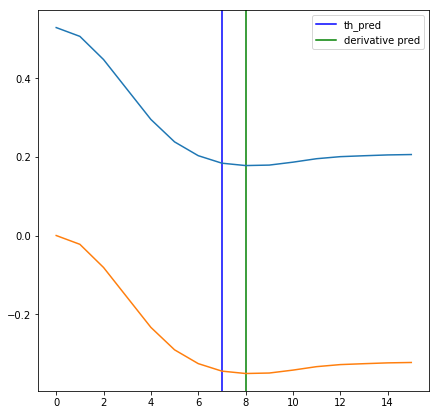

In [53]:
# heuristic max using model 4 (upper case; puncuation)

alpha = 0.6

sim = [heuristic_max(corpus[idx],corpus[idx+i],flag=True) for i in range(s_size)]
smooth_score = smooth(np.array(sim))

s = smooth_score
depth_score = [0]
lpeak = s[0]
for k in range(1,len(s)):
    lpeak = max(s[0:k+1])
    depth_score.append(s[k]-lpeak)

th = np.mean(depth_score) - alpha*np.std(depth_score)
print(np.std(depth_score),th)
pred = np.where(depth_score<th)[0][0]
delta = np.array(depth_score[1:]) - np.array(depth_score[:-1])
delta = np.where(delta>0)[0]
pred1 = delta[0] if len(delta>0) else s_size-1

plt.figure(figsize=(7,7))
plt.axvline(pred,c='b',label='th_pred')
plt.axvline(pred1,c='g',label='derivative pred')
plt.legend()
plt.plot(smooth_score)
plt.plot(depth_score)

In [32]:
len(idx_question)/s_size

847.375

In [236]:
org_stem = sentences_stem[idx_question[idx]:idx_question[idx]+s_size]

In [ ]:
corpus

In [237]:
[(corpus[idx],corpus[idx+i]) for i in range(s_size)]

[(['bv', 'i', 'like', 'to', 'hear', 'it'],
  ['bv', 'i', 'like', 'to', 'hear', 'it']),
 (['bv', 'i', 'like', 'to', 'hear', 'it'],
  ['you', 'do', 'nt', 'like', 'to', 'say', 'it']),
 (['bv', 'i', 'like', 'to', 'hear', 'it'], ['bv', 'i', 'love', 'you']),
 (['bv', 'i', 'like', 'to', 'hear', 'it'],
  ['i', 'm', 'so', 'scare', 'sometim']),
 (['bv', 'i', 'like', 'to', 'hear', 'it'],
  ['we', 're', 'wander', 'you', 'and', 'i']),
 (['bv', 'i', 'like', 'to', 'hear', 'it'], ['fay', 'like', 'bird']),
 (['bv', 'i', 'like', 'to', 'hear', 'it'],
  ['cook',
   'so',
   'you',
   're',
   'say',
   'you',
   'wanna',
   'produc',
   'it',
   'as',
   'well']),
 (['bv', 'i', 'like', 'to', 'hear', 'it'],
  ['so',
   'i',
   'm',
   'suddenli',
   'feel',
   'a',
   'littl',
   'bit',
   'out',
   'in',
   'the',
   'cold',
   'here']),
 (['bv', 'i', 'like', 'to', 'hear', 'it'],
  ['you', 'know', 'what', 'i', 'm', 'say']),
 (['bv', 'i', 'like', 'to', 'hear', 'it'],
  ['well', 'you', 'wanna', 'help', 'pro

In [238]:
corpus[idx]

['bv', 'i', 'like', 'to', 'hear', 'it']

In [239]:
len(org_stem)

16

In [244]:
i

499

In [248]:
org_stem[s_size]

IndexError: list index out of range

In [249]:
np.min((9,15))

9

In [73]:
wordcnt_ = []
len_ = []
i = 0
while(i<500):
    print(i)
    idx = np.random.randint(5000)
    org = sentences[idx_question[idx]:idx_question[idx]+s_size]
    org_stem = sentences_stem[idx_question[idx]:idx_question[idx]+s_size]

    alpha = 0.6

    sim = [heuristic_max(org_stem[i],org_stem[i+1]) for i in range(s_size-1)]
    smooth_score = smooth(np.array(sim))

    s = smooth_score
    depth_score = [0]
    lpeak = s[0]
    for k in range(1,len(s)):
        lpeak = max(s[0:k+1])
        depth_score.append(s[k]-lpeak)

    th = np.mean(depth_score) - alpha*np.std(depth_score)
    try:
        pred0 = np.where(depth_score<=th)[0][0]
    except:
        pred0 = s_size - 1
#         continue
    delta = np.array(depth_score[1:]) - np.array(depth_score[:-1])
    delta = np.where(delta>0)[0]
    pred1 = delta[0] if len(delta>0) else pred0
    pred = np.min((pred1,pred0)) if pred0<s_size-1 else pred1
#     pred1 = pred
    
#     if pred1%2==0:
#         i -= 1
#         print('not even length',i)
#         continue
#     print(i)
#     th_pred = sentences[idx_question[idx]:idx_question[idx]+pred+1]
#     delta_pred = sentences[idx_question[idx]:idx_question[idx]+pred1+1]
    pred_text = org[:pred+1]
    if '?' in pred_text[-1]:
        continue
    len_.append(pred)
    wordcnt_.append(np.mean([len(tokenizer.tokenize(x)) for x in pred_text]))
    
    with open('session_segmentation.txt', 'a') as f:
        
#         f.write("Mean of session depth score: %f \n" % np.mean(depth_score))
#         f.write("Std of session depth score: %f \n" % np.std(depth_score))
        f.write("==========Starting of Session %s.==========\n" % str(i))
        f.write("==========Starting of Dialogue %s.==========\n" % str(i))
        for j in range(len(org)):
            if j<=pred:
                f.write('Turn %s: '% str(j+1))
            f.write("%s\n" % org[j])
#             if i == pred:
#                 f.write("++++Segment boundary by threshold method++++\n")
            if j == pred:
#                 f.write("----Segment boundary by derivative method----\n")
                f.write("==========Predicted ending of Dialogue %s.==========\n" % str(i))
        f.write("==========End of this session==========\n\n\n")
    i += 1

0
0
1
2
3
4
5
6
7
8
8
8
8
9
10
11
11
12
13
13
14
15
16
17
17
18
19
20
21
22
22
23
24
25
26
26
27
28
29
30
31
32
33
34
34
34
35
36
37
38
39
40
40
41
42
43
44
44
45
45
45
46
47
48
48
49
50
51
52
53
53
54
55
55
56
57
58
59
59
60
61
62
63
64
64
65
65
66
67
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
86


/anaconda3/envs/semester/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in greater_equal
/anaconda3/envs/semester/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in greater


87
88
89
90
91
92
93
94
95
96
97
98
99
100
100
101
102
103
104
105
106
107
108
109
110
111
112
113
113
113
114
115
116
117
118
119
120
120
121
122
123
123
124
125
126
127
128
129
130
130
131
132
133
133
134
135
136
137
138
138
139
139
140
141
142
143
144
145
146
147
148
148
148
149
150
151
152
153
154
155
155
155
156
157
158
158
158
159
160
161
162
163
164
165
166
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
185
185
186
187
188
189
190
191
192
193
194
195
196
197
198
198
198
199
200
201
202
202
203
203
203
204
204
205
206
207
208
209
210
211
212
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
226
227
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
241
242
243
244
245
245
246
247
248
248
249
250
251
252
253
253
254
255
256
257
258
258
259
260
261
262
263
264
265
266
267
267
267
268
269
270
271
271
271
271
271
271
271
272
273
273
274
275
276
276
277
278
279
280
281
282
282
283
284
285
286
286
287
288
289
290
291
292
293
294
294
2

In [176]:
from nltk.stem import PorterStemmer 
from nltk.tokenize import word_tokenize 
   
ps = PorterStemmer() 
  
# choose some words to be stemmed 
words = ["happen", "my", "you", "me", "I"] 
  
for w in words: 
    print(w, " : ", ps.stem(w)) 

happen  :  happen
my  :  my
you  :  you
me  :  me
I  :  I


In [64]:
np.mean(len_)

6.224

In [63]:
np.mean(wordcnt_)

6.995665745365745

In [164]:
[len(tokenizer.tokenize(x)) for x in pred_text]

[2, 10, 9, 10, 11, 9]

In [160]:
pred_text

['oh , yeah ?',
 'how do you fancy doing a little favour for me ?',
 "that alan 's been giving me mum agg again .",
 "seems he wo n't take no for an answer .",
 'keeps banging on the door come <num> : <num> in the morning .',
 "i can see he 's got you all aeriated ."]

In [163]:
tokenizer.tokenize(pred_text[0])

['oh', 'yeah']